- Ayni veriyi daha az ozellik (feature) ile temsil etme
- Makine ogrenmesinde pipeline kullanimi icin son derece onemli
- Temel bilesen analizi ile boyut azaltma

In [ ]:
import numpy as np
data = np.loadtxt('seeds_dataset.txt')
data2 = data[:,0:7]
lenght = data[:,3]
width = data[:,4]
geometry = data[:,3:5]
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(data2)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.axvline(x=1.5, ls = '--', c='r')
plt.show()

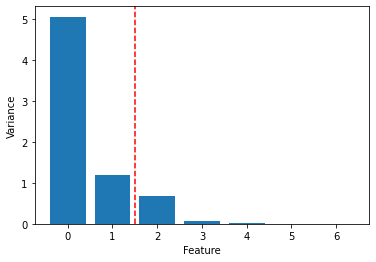

- Varyans degeri yuksek : informative
- Varyans degeri dusuk : noisy    

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(data2)
transformed = pca.transform(data2)
print(transformed.shape)

(210, 2)

In [ ]:
location = data[:,-1]

import matplotlib.pyplot as plt
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y, c = location)
plt.show()

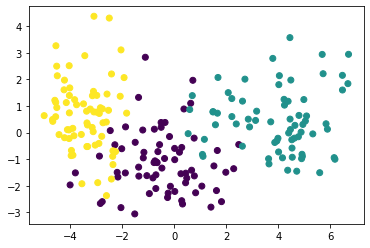

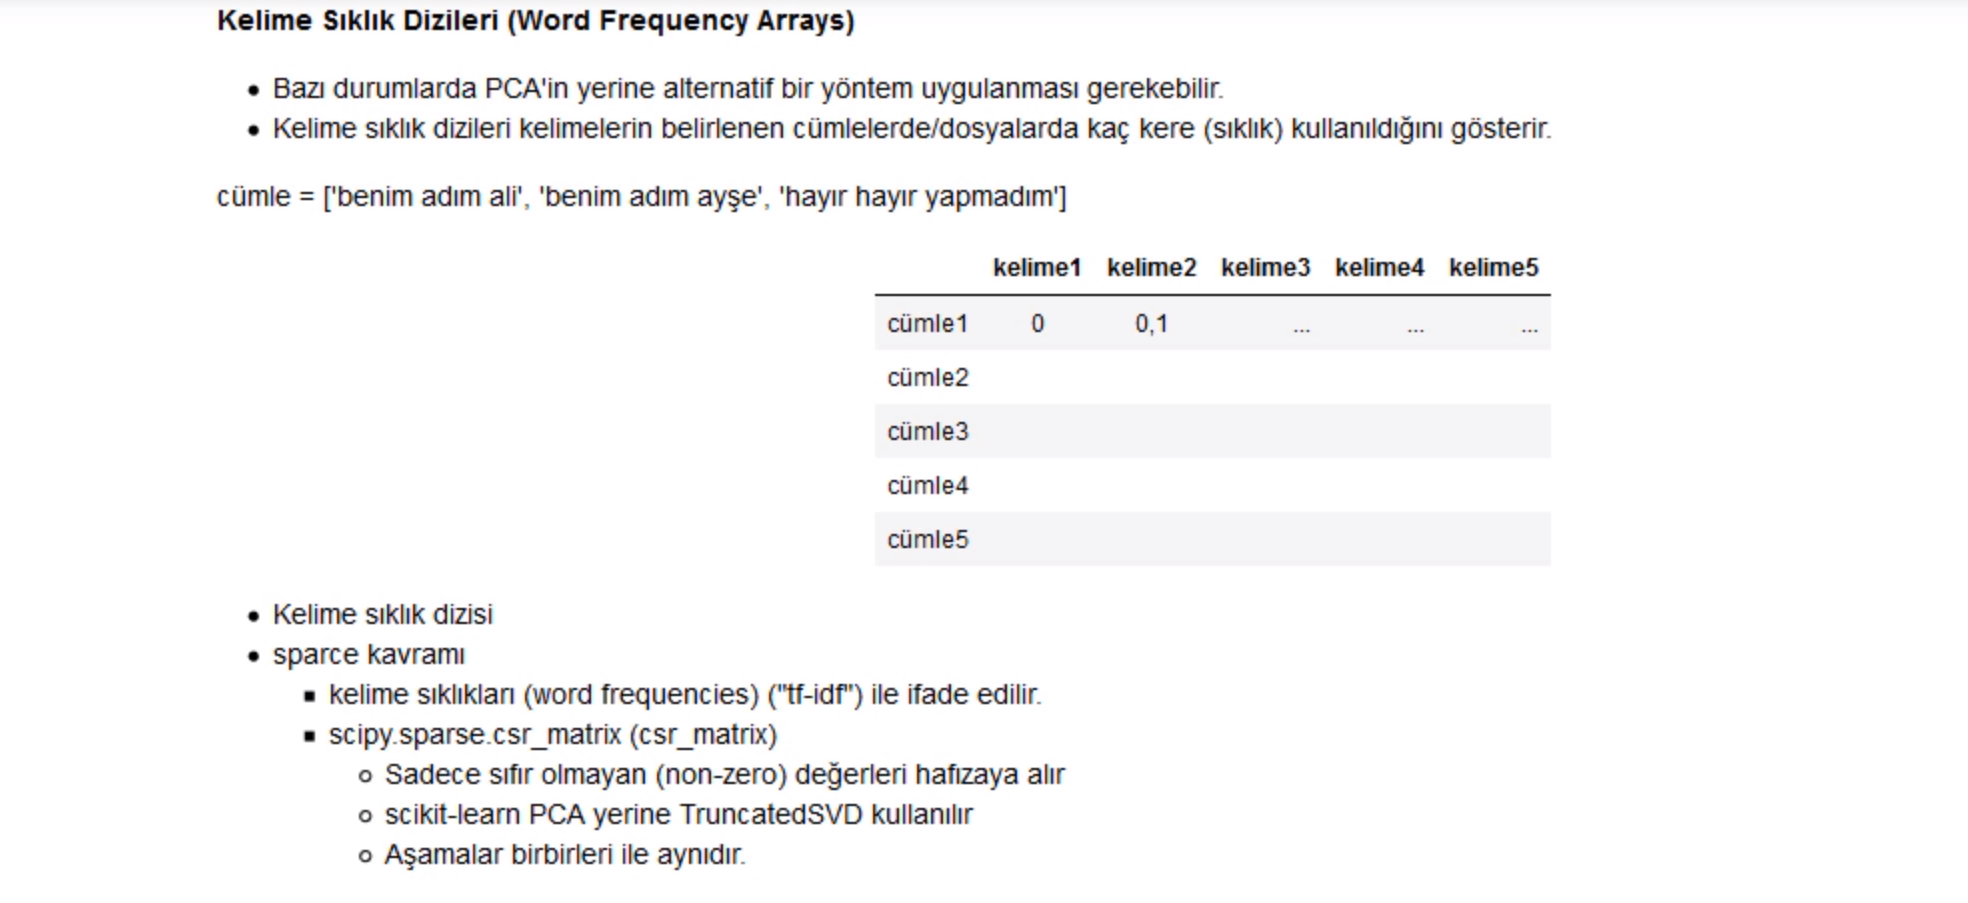

In [ ]:
# Wikipedia Uygulamasi
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

svd = TruncatedSVD(n_components = 50)
kmeans = KMeans(n_clusters = 6)
pipeline = make_pipeline(svd, kmeans)

In [ ]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

data = pd.read_csv('wikipedia-vectors.csv', index_col= 0)
articles = csr_matrix(data.transpose())
titles = list(data.columns)

pipeline.fit(articles)
labels = pipeline.predict(articles)
data_new = pd.DataFrame({'label': labels, 'article': titles})
print(data_new.sort_values('label'))

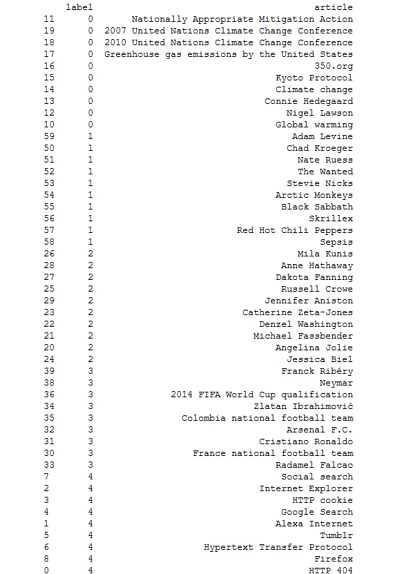

Soru 1: **Varyansların dağılımını göstermek için hangi grafik türü kullanılabilir?**

In [1]:
#Cevap: Bar

Soru 2: **Varyans aralığı yüksek veri etkisiz veridir.**

In [2]:
#Cevap: Yanlis

Soru 3: **Boyut azaltmada transform edilmiş veri ile orijinal veri setinin boyutları aynıdır.**

In [3]:
#Cevap: Dogru